In [1119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

Data collection,cleaning and visusalisation

In [1120]:
housing= pd.read_csv("Mumbai House Prices.csv")

In [1121]:
housing.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


bhk -contains the number of bedroom, hall, kitchen collectively.

type-contains the type of house.

locality-contains information about the locality of house.

area-contains the area of house, unit of measurement is sq ft.

price-contains the price value for the house.

price_unit-contains the price unit for the house which can be either L (Lakh) or Cr (Crore).

region-contains the region of the house.

status-contains information about the status of the house.

age-contains the information regarding age of house.

In [1122]:
housing.shape

(76038, 9)

In [1123]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


In [1124]:
housing.describe()

,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


In [1125]:
housing['locality'].unique()

array(['Lak And Hanware The Residency Tower',
       'Radheya Sai Enclave Building No 2', 'Romell Serene', ...,
       'Ahuja Prasadam Phase III', 'HBS Marineview', 'Hubtown Serene'],
      dtype=object)

In [1126]:
housing['region'].unique()

array(['Andheri West', 'Naigaon East', 'Borivali West', 'Panvel',
       'Mira Road East', 'Parel', 'Boisar', 'Santacruz East',
       'Badlapur East', 'Fort', 'Badlapur West', 'Khopoli', 'Chembur',
       'Jogeshwari West', 'Vasai', 'Kalamboli', 'Powai', 'Ghansoli',
       'Thane West', 'Vikhroli', 'Bhiwandi', 'Airoli', 'Ambernath West',
       'Borivali East', 'Virar', 'Kharghar', 'Ulwe', 'Kamothe',
       'Jogeshwari East', 'Mulund West', 'Palghar', 'Goregaon West',
       'Taloja', 'Rasayani', 'Ghatkopar East', 'Ulhasnagar', 'Dombivali',
       'Kewale', 'Nala Sopara', 'Goregaon East', 'Kandivali East',
       'Kurla', 'Andheri East', 'Dahisar', 'Karanjade', 'Mahim', 'Vashi',
       'Malad West', 'Girgaon', 'Dadar West', 'Bandra West',
       'Kandivali West', 'Kalyan West', 'Neral', 'Kalyan East', 'Karjat',
       'Ghatkopar West', 'Dronagiri', 'Mulund East', 'Navade', 'Ambivali',
       'Agripada', 'Owale', 'Ville Parle East', 'Kalwa', 'Khar',
       'Santacruz West', 'Nerul', 'K

In [1127]:
housing['type'].unique()

array(['Apartment', 'Villa', 'Studio Apartment', 'Independent House',
       'Penthouse'], dtype=object)

In [1128]:
housing2=housing.drop(['locality','status'],axis='columns')
housing2.shape

(76038, 7)

In [1129]:
housing2.head()

,bhk,type,area,price,price_unit,region,age
0,3,Apartment,685,2.50,Cr,Andheri West,New
1,2,Apartment,640,52.51,L,Naigaon East,New
2,2,Apartment,610,1.73,Cr,Borivali West,New
3,2,Apartment,876,59.98,L,Panvel,New
4,2,Apartment,659,94.11,L,Mira Road East,New


In [1130]:
housing2["Amount"] = housing2['price'].astype(str) +" "+ housing["price_unit"]
housing2.head()

,bhk,type,area,price,price_unit,region,age,Amount
0,3,Apartment,685,2.50,Cr,Andheri West,New,2.5 Cr
1,2,Apartment,640,52.51,L,Naigaon East,New,52.51 L
2,2,Apartment,610,1.73,Cr,Borivali West,New,1.73 Cr
3,2,Apartment,876,59.98,L,Panvel,New,59.98 L
4,2,Apartment,659,94.11,L,Mira Road East,New,94.11 L


In [1131]:
def fun(x):
    if 'Cr' in x or 'cr' in x:
        s=str(x).split(" ")[0]
        s1=str(int(float(s)*100))
        return s1
    else:
        s=str(x).split(" ")[0]
        return s

In [1132]:
housing2['Amount']=housing2['Amount'].map(lambda x:fun(x))

In [1133]:
housing2['Amount']

0          250
1        52.51
2          173
3        59.98
4        94.11
         ...  
76033      700
76034     1200
76035     1000
76036      425
76037     2500
Name: Amount, Length: 76038, dtype: object

In [1134]:
housing2.head()

,bhk,type,area,price,price_unit,region,age,Amount
0,3,Apartment,685,2.50,Cr,Andheri West,New,250
1,2,Apartment,640,52.51,L,Naigaon East,New,52.51
2,2,Apartment,610,1.73,Cr,Borivali West,New,173
3,2,Apartment,876,59.98,L,Panvel,New,59.98
4,2,Apartment,659,94.11,L,Mira Road East,New,94.11


In [1135]:
housing3=housing2.drop(['price','price_unit'],axis='columns')
housing3.shape

(76038, 6)

In [1136]:
housing3.head()

,bhk,type,area,region,age,Amount
0,3,Apartment,685,Andheri West,New,250
1,2,Apartment,640,Naigaon East,New,52.51
2,2,Apartment,610,Borivali West,New,173
3,2,Apartment,876,Panvel,New,59.98
4,2,Apartment,659,Mira Road East,New,94.11


In [1137]:
housing4 = housing3.rename({'Amount': 'Price_in_Lakhs'}, axis='columns')
housing4.head()

,bhk,type,area,region,age,Price_in_Lakhs
0,3,Apartment,685,Andheri West,New,250
1,2,Apartment,640,Naigaon East,New,52.51
2,2,Apartment,610,Borivali West,New,173
3,2,Apartment,876,Panvel,New,59.98
4,2,Apartment,659,Mira Road East,New,94.11


In [1138]:
housing4.isnull().sum()

bhk               0
type              0
area              0
region            0
age               0
Price_in_Lakhs    0
dtype: int64

In [1139]:
housing4['bhk'].unique()

array([ 3,  2,  5,  1,  4,  6,  9,  8, 10,  7], dtype=int64)

In [1140]:
housing4.dtypes

bhk                int64
type              object
area               int64
region            object
age               object
Price_in_Lakhs    object
dtype: object

In [1141]:
housing4['Price_in_Lakhs'] = housing4['Price_in_Lakhs'].astype('float')
housing4.dtypes

bhk                 int64
type               object
area                int64
region             object
age                object
Price_in_Lakhs    float64
dtype: object

In [1142]:
housing5=housing4.copy()
housing5['Price_per_sqft']=housing5['Price_in_Lakhs']*100000/housing5['area']
housing5.head()

,bhk,type,area,region,age,Price_in_Lakhs,Price_per_sqft
0,3,Apartment,685,Andheri West,New,250.00,36496.350365
1,2,Apartment,640,Naigaon East,New,52.51,8204.687500
2,2,Apartment,610,Borivali West,New,173.00,28360.655738
3,2,Apartment,876,Panvel,New,59.98,6847.031963
4,2,Apartment,659,Mira Road East,New,94.11,14280.728376


In [1143]:
housing6=housing5.replace('Unknown',value=np.NaN)
housing5.head()

,bhk,type,area,region,age,Price_in_Lakhs,Price_per_sqft
0,3,Apartment,685,Andheri West,New,250.00,36496.350365
1,2,Apartment,640,Naigaon East,New,52.51,8204.687500
2,2,Apartment,610,Borivali West,New,173.00,28360.655738
3,2,Apartment,876,Panvel,New,59.98,6847.031963
4,2,Apartment,659,Mira Road East,New,94.11,14280.728376


In [1144]:
housing6.isnull().sum()

bhk                   0
type                  0
area                  0
region                0
age               14609
Price_in_Lakhs        0
Price_per_sqft        0
dtype: int64

In [1145]:
house7=housing6.dropna()
house7.shape

(61429, 7)

In [1146]:
house7.isnull().sum()

bhk               0
type              0
area              0
region            0
age               0
Price_in_Lakhs    0
Price_per_sqft    0
dtype: int64

In [1147]:
len(house7.region.unique())

205

In [1148]:
house7.region

0          Andheri West
1          Naigaon East
2         Borivali West
3                Panvel
4        Mira Road East
              ...      
76025        Thane West
76026        Thane West
76027        Thane West
76028        Thane West
76029        Thane West
Name: region, Length: 61429, dtype: object

In [1149]:
house7.region = house7.region.apply(lambda x: x.strip())
region_stats = house7['region'].value_counts(ascending=False)
region_stats

C:\Users\Admin\AppData\Local\Temp\ipykernel_10816\1127373276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house7.region = house7.region.apply(lambda x: x.strip())


region
Mira Road East         9759
Thane West             7857
Dombivali              2637
Kandivali East         2267
Kharghar               2028
                       ... 
Peddar Road               1
Kamathipura               1
Usarghar Gaon             1
Vevoor                    1
Pestom Sagar Colony       1
Name: count, Length: 205, dtype: int64

In [1150]:
region_stats_less_than_10 = region_stats[region_stats<=10]
region_stats_less_than_10

region
Kanjurmarg East        10
Sector 20 Kamothe      10
Saphale                10
Koproli                10
Dahisar West            9
                       ..
Peddar Road             1
Kamathipura             1
Usarghar Gaon           1
Vevoor                  1
Pestom Sagar Colony     1
Name: count, Length: 96, dtype: int64

In [1151]:
house7.region = house7.region.apply(lambda x: 'other' if x in region_stats_less_than_10 else x)
len(house7.region.unique())

C:\Users\Admin\AppData\Local\Temp\ipykernel_10816\3368689266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house7.region = house7.region.apply(lambda x: 'other' if x in region_stats_less_than_10 else x)


110

In [1152]:
house7 = house7[~(house7.area/house7.bhk<250)]
house7.shape

(60507, 7)

In [1153]:
house7.head()

,bhk,type,area,region,age,Price_in_Lakhs,Price_per_sqft
1,2,Apartment,640,Naigaon East,New,52.51,8204.687500
2,2,Apartment,610,Borivali West,New,173.00,28360.655738
3,2,Apartment,876,Panvel,New,59.98,6847.031963
4,2,Apartment,659,Mira Road East,New,94.11,14280.728376
5,2,Apartment,826,Parel,New,330.00,39951.573850


REMOVING OUTLIERS

In [1154]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('region'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
house7 = remove_pps_outliers(house7)
house7.shape

(44828, 7)

Taking insights from cleaned data

Text(0, 0.5, 'Count')

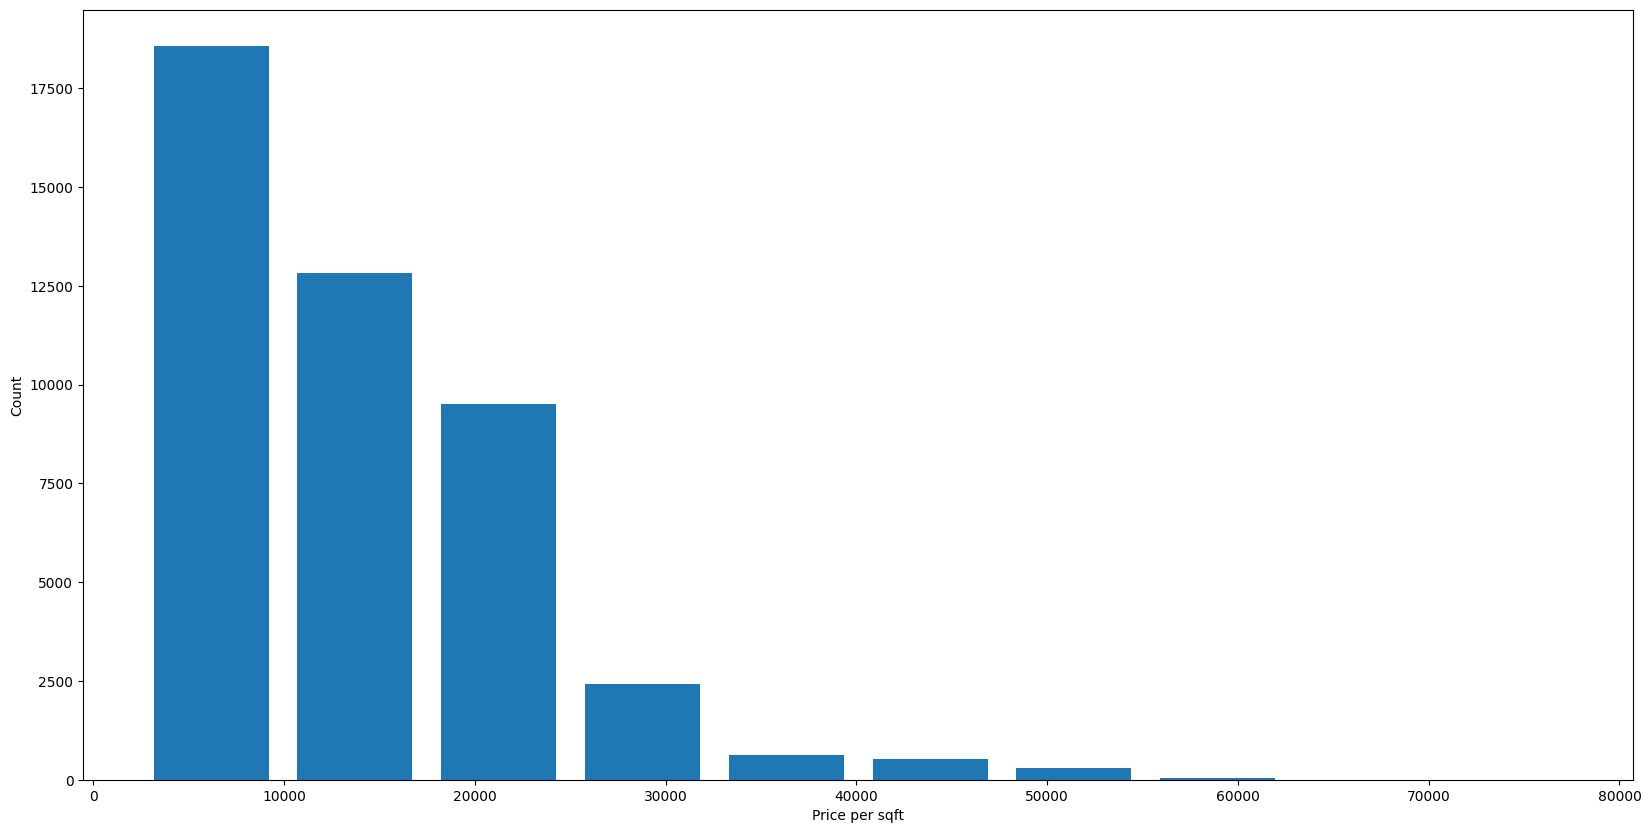

In [1155]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(house7.Price_per_sqft,rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

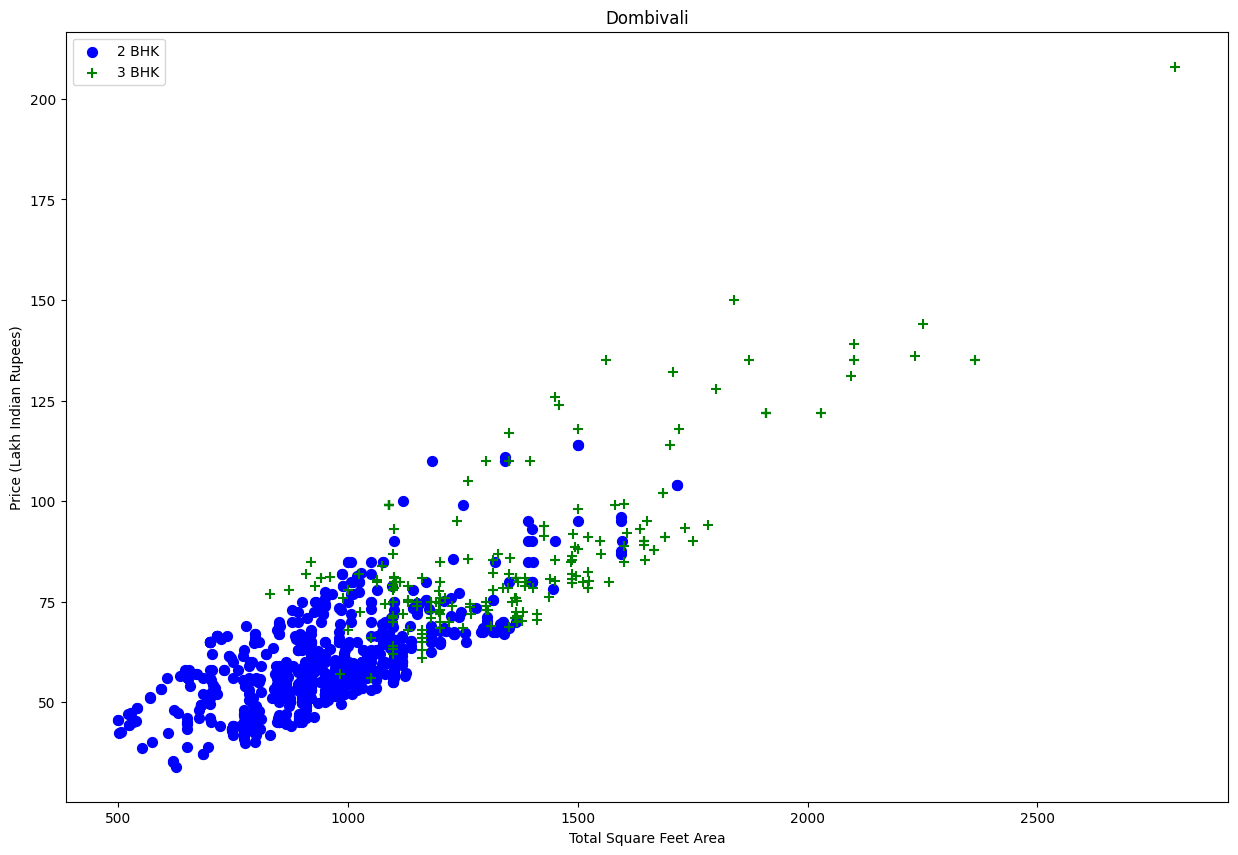

In [1156]:
import matplotlib.pyplot as plt
import matplotlib

def chart(df, region):
    bhk2 = df[(df.region == region) & (df.bhk == 2)]
    bhk3 = df[(df.region == region) & (df.bhk == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    
    plt.scatter(bhk2.area, bhk2.Price_in_Lakhs, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.area, bhk3.Price_in_Lakhs, marker='+', color='green', label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(region)
    plt.legend()


chart(house7, "Dombivali")
plt.show()

In [1157]:
house7.head()
house7.shape

(44828, 7)

In [1158]:
house7.head()

,bhk,type,area,region,age,Price_in_Lakhs,Price_per_sqft
0,2,Apartment,650,Agripada,Resale,262.0,40307.692308
1,1,Apartment,803,Agripada,Resale,225.0,28019.925280
2,1,Apartment,684,Agripada,Resale,170.0,24853.801170
3,1,Apartment,545,Agripada,Resale,160.0,29357.798165
4,2,Apartment,1650,Agripada,Resale,350.0,21212.121212


In [1159]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for region, region_df in df.groupby('region'):
        global bhk_stats
        bhk_stats = {}
        for bhk, bhk_df in region_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_per_sqft),
                'std': np.std(bhk_df.Price_per_sqft),
                'count': bhk_df.shape[0]
                
            }
        for bhk, bhk_df in region_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
house7 = remove_bhk_outliers(house7)
print(house7.shape)

(31707, 7)


In [1160]:
bhk_stats

{1: {'mean': 8466.946940876995, 'std': 4663.239107512925, 'count': 151},
 2: {'mean': 8427.987682394947, 'std': 3929.076622742189, 'count': 79},
 3: {'mean': 13342.447580149614, 'std': 3406.8271645655864, 'count': 32},
 4: {'mean': 8476.190476190477, 'std': 5793.629049752631, 'count': 3}}

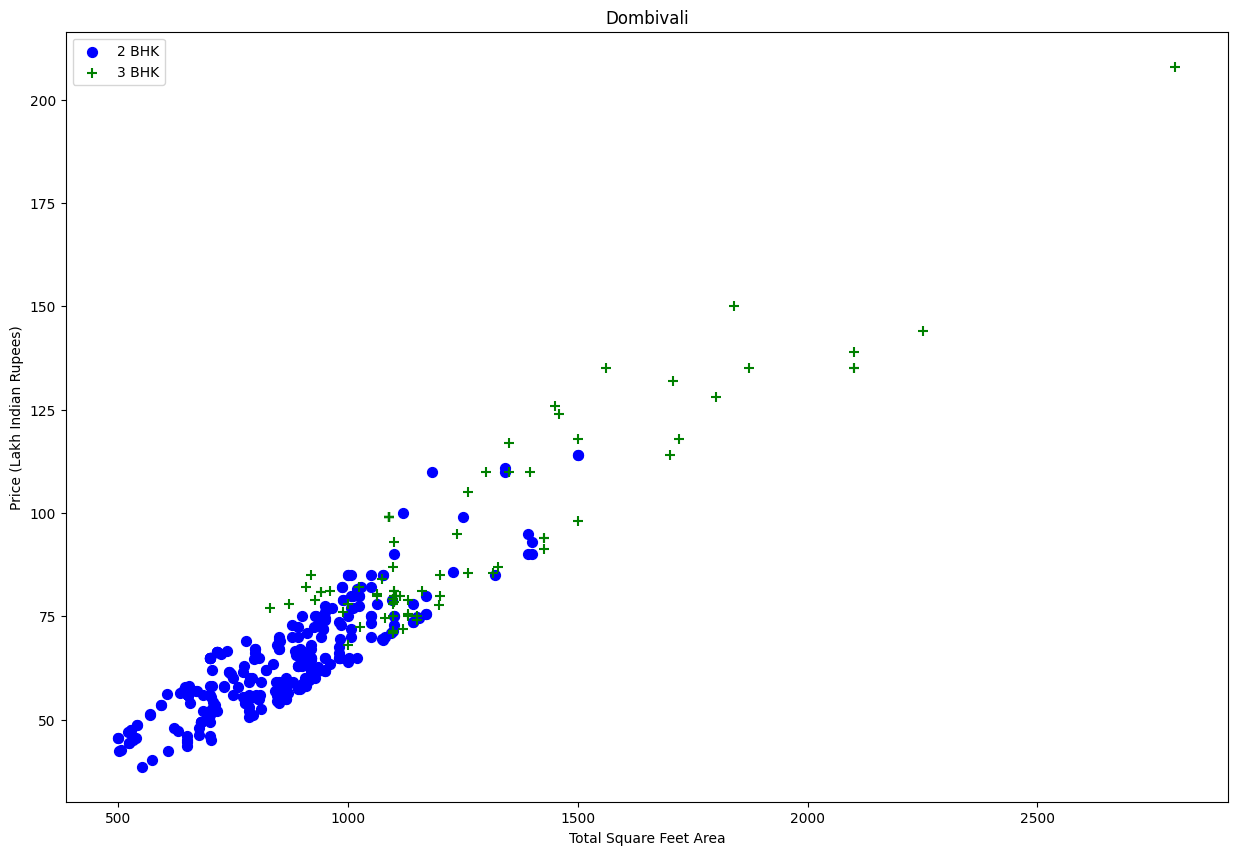

In [1161]:
chart(house7,'Dombivali')

In [1162]:
house8=house7.drop(['Price_per_sqft'],axis='columns')
house8.head()

,bhk,type,area,region,age,Price_in_Lakhs
0,2,Apartment,650,Agripada,Resale,262.0
1,1,Apartment,803,Agripada,Resale,225.0
2,1,Apartment,684,Agripada,Resale,170.0
3,1,Apartment,545,Agripada,Resale,160.0
10,4,Apartment,3454,Agripada,New,1250.0


Removing dummy values from specific features

In [1163]:
dummies=pd.get_dummies(house8.region)
dummies.head(20)

,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,Badlapur East,Badlapur West,Bandra East,...,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1164]:
house9=pd.concat([house8,dummies.drop('other',axis='columns')],axis='columns')
house9.head()

,bhk,type,area,region,age,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,Apartment,650,Agripada,Resale,262.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Apartment,803,Agripada,Resale,225.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,Apartment,684,Agripada,Resale,170.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,Apartment,545,Agripada,Resale,160.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,4,Apartment,3454,Agripada,New,1250.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1165]:
house9=house9.drop('region',axis='columns')
house9.head()

,bhk,type,area,age,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,Apartment,650,Resale,262.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Apartment,803,Resale,225.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,Apartment,684,Resale,170.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,Apartment,545,Resale,160.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,4,Apartment,3454,New,1250.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1166]:
X=house9.drop(['Price_in_Lakhs'],axis='columns')
X.head(10)

,bhk,type,area,age,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,Apartment,650,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Apartment,803,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,Apartment,684,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,Apartment,545,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,4,Apartment,3454,New,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,3,Apartment,2416,New,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,3,Apartment,1716,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,1,Apartment,800,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24,2,Apartment,1300,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25,1,Apartment,800,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1167]:
dummies_2=pd.get_dummies(house9.type)
dummies_2.head(10)

,Apartment,Independent House,Studio Apartment,Villa
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
10,True,False,False,False
11,True,False,False,False
14,True,False,False,False
23,True,False,False,False
24,True,False,False,False
25,True,False,False,False


In [1168]:
house10=pd.concat([house9,dummies_2.drop('Studio Apartment',axis='columns')],axis='columns')
house10.head()

,bhk,type,area,age,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,...,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,Apartment,Independent House,Villa
0,2,Apartment,650,Resale,262.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,Apartment,803,Resale,225.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,Apartment,684,Resale,170.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,Apartment,545,Resale,160.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10,4,Apartment,3454,New,1250.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [1169]:
house10=house10.drop('type',axis='columns')
house10.head()

,bhk,area,age,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,...,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,Apartment,Independent House,Villa
0,2,650,Resale,262.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,803,Resale,225.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,684,Resale,170.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,545,Resale,160.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10,4,3454,New,1250.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [1170]:
dummies_3=pd.get_dummies(house10.age)
dummies_3.head(10)

,New,Resale
0,False,True
1,False,True
2,False,True
3,False,True
10,True,False
11,True,False
14,False,True
23,False,True
24,False,True
25,False,True


In [1171]:
house10=pd.concat([house10,dummies_3.drop('Resale',axis='columns')],axis='columns')
house10.head()

,bhk,area,age,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,...,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,Apartment,Independent House,Villa,New
0,2,650,Resale,262.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,803,Resale,225.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1,684,Resale,170.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1,545,Resale,160.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10,4,3454,New,1250.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [1172]:
house10=house10.drop('age',axis='columns')
house10.head()

,bhk,area,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,...,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,Apartment,Independent House,Villa,New
0,2,650,262.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,803,225.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1,684,170.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1,545,160.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10,4,3454,1250.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [1173]:
house10.shape

(31707, 116)

In [1174]:
house10.head()

,bhk,area,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,...,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,Apartment,Independent House,Villa,New
0,2,650,262.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,803,225.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1,684,170.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1,545,160.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10,4,3454,1250.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [1175]:
X=house10.drop(['Price_in_Lakhs'],axis='columns')
Y=house10['Price_in_Lakhs']

Data splitting using sklearn into test and train dataset

In [1177]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X.values,Y,test_size=0.3,random_state=10)
print(f"Rows in train set: {len(X_train)}\nRows in test set: {len(X_test)}\n")

Rows in train set: 22194
Rows in test set: 9513



Applying Different Algorithms to predict price

In [1176]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [1178]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)

LR_prediction=lr_clf.predict(X_test)
print('R2 Score :',r2_score(LR_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(LR_prediction,Y_test))
print('MSE:',mean_squared_error(LR_prediction,Y_test))
rmse = sqrt(mean_squared_error(LR_prediction,Y_test))
print('RMSE:',rmse)

R2 Score : 86.17041681297705
MAE: 33.165915857621336
MSE: 3543.737925896316
RMSE: 59.529303085928326


In [1179]:
pd.DataFrame(data={'Actual':Y_test,'Predicted':LR_prediction}).head()

,Actual,Predicted
16873,24.5,48.894558
20027,169.0,139.190668
39708,176.0,198.126163
22644,66.0,69.912925
14622,102.0,77.997661


In [1180]:
# DT = DecisionTreeRegressor()
# DT.fit(X_train,Y_train)
# DT.score(X_test, Y_test)

# DT_prediction=DT.predict(X_test)
# print('R2 Score :',r2_score(DT_prediction,Y_test)*100)
# print('MAE:',mean_absolute_error(DT_prediction,Y_test))
# print('MSE:',mean_squared_error(DT_prediction,Y_test))
# rmse = sqrt(mean_squared_error(DT_prediction,Y_test))
# print('RMSE:',rmse)

# DT.score(X_test, Y_test)

In [1181]:
# pd.DataFrame(data={'Actual':Y_test,'Predicted':DT_prediction}).head()

In [1182]:
# RF=RandomForestRegressor()
# RF.fit(X_train,Y_train)

# RF_prediction=RF.predict(X_test)
# print('R2 Score :',r2_score(RF_prediction,Y_test)*100)
# print('MAE:',mean_absolute_error(RF_prediction,Y_test))
# print('MSE:',mean_squared_error(RF_prediction,Y_test))
# rmse = sqrt(mean_squared_error(RF_prediction,Y_test))
# print('RMSE:',rmse)

# RF.score(X_test,Y_test)

In [1183]:
# pd.DataFrame(data={'Actual':Y_test,'Predicted':RF_prediction}).head()

Creating a function that will take input no.of sqft area, location and no.of  bhk and give price according to entered features

In [1184]:
def predict_price(location,sqft,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    M=np.zeros(len(X.columns))
    M[0] = bhk
    M[1] = sqft




    
    if loc_index >= 0:
        M[loc_index] = 1
        
    return lr_clf.predict([M])[0]
    

In [1185]:
predict_price('Andheri West',685, 3)

207.73137209503338

In [1186]:
predict_price('Thane West',937, 2)

193.62536789301524

In [1187]:
predict_price('Naigaon East',640, 2)

57.405878229665916

In [1188]:
predict_price('Borivali West',610, 2)

160.49641401470743

In [1189]:
predict_price('Panvel',409, 1)

10.785290196017428

In [1190]:
import pickle
with open('Mumbai_house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [1191]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))